<a href="https://colab.research.google.com/github/vani105/vani_Intern_Projects1/blob/main/Task_2_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data cleaning and feature engineering are essential steps in preparing a dataset for machine learning models. Using the Titanic dataset

Step-by-Step Guide for Data Cleaning and Feature Engineering on Titanic Dataset

Loading the Titanic Dataset: First, we need to load the dataset using pandas to explore the features and identify any missing or inconsistent data.



# Import Libraries

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data Cleaning

## Load Dataset

In [12]:
df=pd.read_csv('/content/train (1).csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Check for Duplicate Rows

In [13]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
886,False
887,False
888,False
889,False


#### Identify Coloumn Data Types

In [14]:
cat_col = [col for col in df.columns if df[col].dtype == 'object']
num_col = [col for col in df.columns if df[col].dtype != 'object']
print('Categorical columns:', cat_col)
print('Numerical columns:', num_col)

Categorical columns: ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']
Numerical columns: ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


#### Count Unique values in the Categorical Coloumns

In [15]:
df[cat_col].nunique()

,0
Name,891
Sex,2
Ticket,681
Cabin,147
Embarked,3


#### Calculate Missing Values as %

In [16]:
round((df.isnull().sum() / df.shape[0]) * 100, 2)

,0
PassengerId,0.00
Survived,0.00
Pclass,0.00
Name,0.00
Sex,0.00
Age,19.87
SibSp,0.00
Parch,0.00
Ticket,0.00
Fare,0.00


#### Drop Irrelevent or Data-Heavy Missing Coloums

In [17]:
df1 = df.drop(columns=['Name', 'Ticket', 'Cabin'])
df1 = df1.dropna(subset=['Embarked'])
df1['Age'] = df1['Age'].fillna(df1['Age'].mean())


#### Detect Outliers with Box Plot

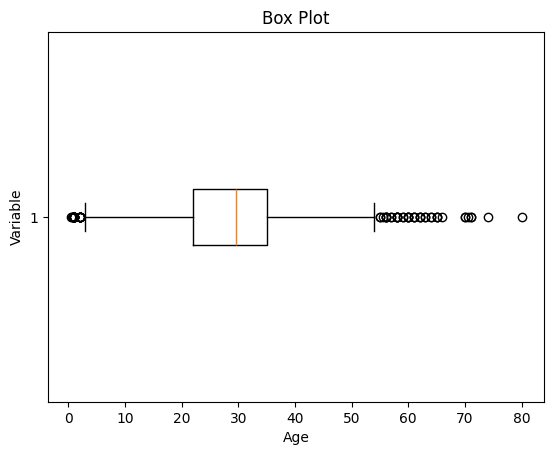

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.boxplot(df1['Age'], vert=False)
plt.ylabel('Variable')
plt.xlabel('Age')
plt.title('Box Plot')
plt.show()


#### Calculate Outlier Boundries and Remove Them

In [19]:
mean = df1['Age'].mean()
std = df1['Age'].std()
lower_bound = mean - 2 * std
upper_bound = mean + 2 * std
df2 = df1[(df1['Age'] >= lower_bound) & (df1['Age'] <= upper_bound)]

#### Impute Missing Data Again if Any

In [20]:
df3 = df2.fillna(df2['Age'].mean())
df3.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


#### Recalculate Outlier Bounds and Remove Outliers from the Updated Data

In [21]:
mean = df3['Age'].mean()
std = df3['Age'].std()
lower_bound = mean - 2 * std
upper_bound = mean + 2 * std
print('Lower Bound :', lower_bound)
print('Upper Bound :', upper_bound)
df4 = df3[(df3['Age'] >= lower_bound) & (df3['Age'] <= upper_bound)]

Lower Bound : 8.978989004171481
Upper Bound : 49.30395961288911


#### Data Validation and verification

In [22]:
X = df4[['Pclass','Sex','Age', 'SibSp','Parch','Fare','Embarked']]
Y = df4['Survived']

#### Data formatting

In [23]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
num_col_ = [col for col in X.columns if X[col].dtype != 'object']
x1 = X
x1[num_col_] = scaler.fit_transform(x1[num_col_])
x1.head()

/tmp/ipython-input-2924802326.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x1[num_col_] = scaler.fit_transform(x1[num_col_])


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1.0,male,0.325,0.125,0.0,0.014151,S
1,0.0,female,0.725,0.125,0.0,0.139136,C
2,1.0,female,0.425,0.000,0.0,0.015469,S
3,0.0,female,0.650,0.125,0.0,0.103644,S
4,1.0,male,0.650,0.000,0.0,0.015713,S


# Feature Engineering

#### One-Hot Encoding

In [24]:
data = {'Color': ['Red', 'Blue', 'Green', 'Blue']}
df = pd.DataFrame(data)
df_encoded = pd.get_dummies(df, columns=['Color'], prefix='Color')
print(df_encoded)

   Color_Blue  Color_Green  Color_Red
0       False        False       True
1        True        False      False
2       False         True      False
3        True        False      False


#### Binning

In [25]:
data = {'Age': [23, 45, 18, 34, 67, 50, 21]}
df = pd.DataFrame(data)
bins = [0, 20, 40, 60, 100]
labels = ['0-20', '21-40', '41-60', '61+']
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
print(df)

   Age Age_Group
0   23     21-40
1   45     41-60
2   18      0-20
3   34     21-40
4   67       61+
5   50     41-60
6   21     21-40


#### Text Data Preprocessing

In [26]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
nltk.download('stopwords')
texts = ["This is a sample sentence.", "Text data preprocessing is important."]
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
vectorizer = CountVectorizer()
def preprocess_text(text):
    words = text.split()
    words = [stemmer.stem(word.lower())
             for word in words if word.lower() not in stop_words]
    return " ".join(words)
cleaned_texts = [preprocess_text(text) for text in texts]
X = vectorizer.fit_transform(cleaned_texts)
print("Cleaned Texts:", cleaned_texts)
print("Vectorized Text:", X.toarray())
print("Feature Names:", vectorizer.get_feature_names_out())


Cleaned Texts: ['sampl sentence.', 'text data preprocess important.']
Vectorized Text: [[0 0 0 1 1 0]
 [1 1 1 0 0 1]]
Feature Names: ['data' 'important' 'preprocess' 'sampl' 'sentence' 'text']


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


#### Feature Splitting

In [27]:
data = {'Full_Address': [
    '123 Elm St, Springfield, 12345', '456 Oak Rd, Shelbyville, 67890']}
df = pd.DataFrame(data)
df[['Street', 'City', 'Zipcode']] = df['Full_Address'].str.extract(
    r'([0-9]+\s[\w\s]+),\s([\w\s]+),\s(\d+)')
print(df)

                     Full_Address      Street         City Zipcode
0  123 Elm St, Springfield, 12345  123 Elm St  Springfield   12345
1  456 Oak Rd, Shelbyville, 67890  456 Oak Rd  Shelbyville   67890
